In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [96]:
data=pd.read_csv("D:/Kaggle/telecom customer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int32
gender              7043 non-null int32
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int32
Churn               7043 non-null int32
dtypes: float64(1), int32(18), int64(2)
memory usag

In [75]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [67]:
data["Churn"].dtype.name

'object'

In [74]:
labelEncoder=LabelEncoder()
for column in data.columns:
    print(column)
    if(data[column].dtype.name=='object'):
        labelEncoder=labelEncoder.fit(data[column])
        data[column]=labelEncoder.transform(data[column])
# data=data.replace({"Yes":"1","No":"0"})



customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [17]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [22]:
from sklearn.feature_selection import SelectKBest,chi2
features_selection=SelectKBest(chi2,k=10)
features_list=features_selection.fit(data.iloc[:,1:19],data.loc[:,"Churn"])


ValueError: could not convert string to float: 'Female'

In [97]:
[data[a].value_counts() for a in data.columns if data[a].dtype.name=='object']

[1550-EENBN    1
 8292-ITGYJ    1
 7599-FKVXZ    1
 4903-CNOZC    1
 8143-ETQTI    1
 7739-LAXOG    1
 5081-NWSUP    1
 5976-JCJRH    1
 8467-WYNSR    1
 3030-YDNRM    1
 7134-HBPBS    1
 8402-EIVQS    1
 3211-ILJTT    1
 8384-FZBJK    1
 8990-ZXLSU    1
 6506-EYCNH    1
 8149-RSOUN    1
 0151-ONTOV    1
 7157-SMCFK    1
 9483-GCPWE    1
 9758-MFWGD    1
 4895-TMWIR    1
 0023-UYUPN    1
 1299-AURJA    1
 8028-PNXHQ    1
 5482-VXSXJ    1
 8133-ANHHJ    1
 5405-ZMYXQ    1
 1169-WCVAK    1
 7216-KAOID    1
              ..
 7508-MYBOG    1
 1229-RCALF    1
 2782-LFZVW    1
 5847-MXBEO    1
 1036-GUDCL    1
 2072-ZVJJX    1
 3067-SVMTC    1
 1716-LSAMB    1
 2625-TRCZQ    1
 5327-XOKKY    1
 4925-LMHOK    1
 6086-ESGRL    1
 1728-CXQBE    1
 8570-KLJYJ    1
 2027-OAQQC    1
 6519-CFDBX    1
 4075-WKNIU    1
 0980-PVMRC    1
 3982-DQLUS    1
 2826-UWHIS    1
 7729-XBTWX    1
 6075-QMNRR    1
 2725-KXXWT    1
 9207-ZPANB    1
 3926-CUQZX    1
 8695-ARGXZ    1
 8309-IEYJD    1
 5899-OUVKV   

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

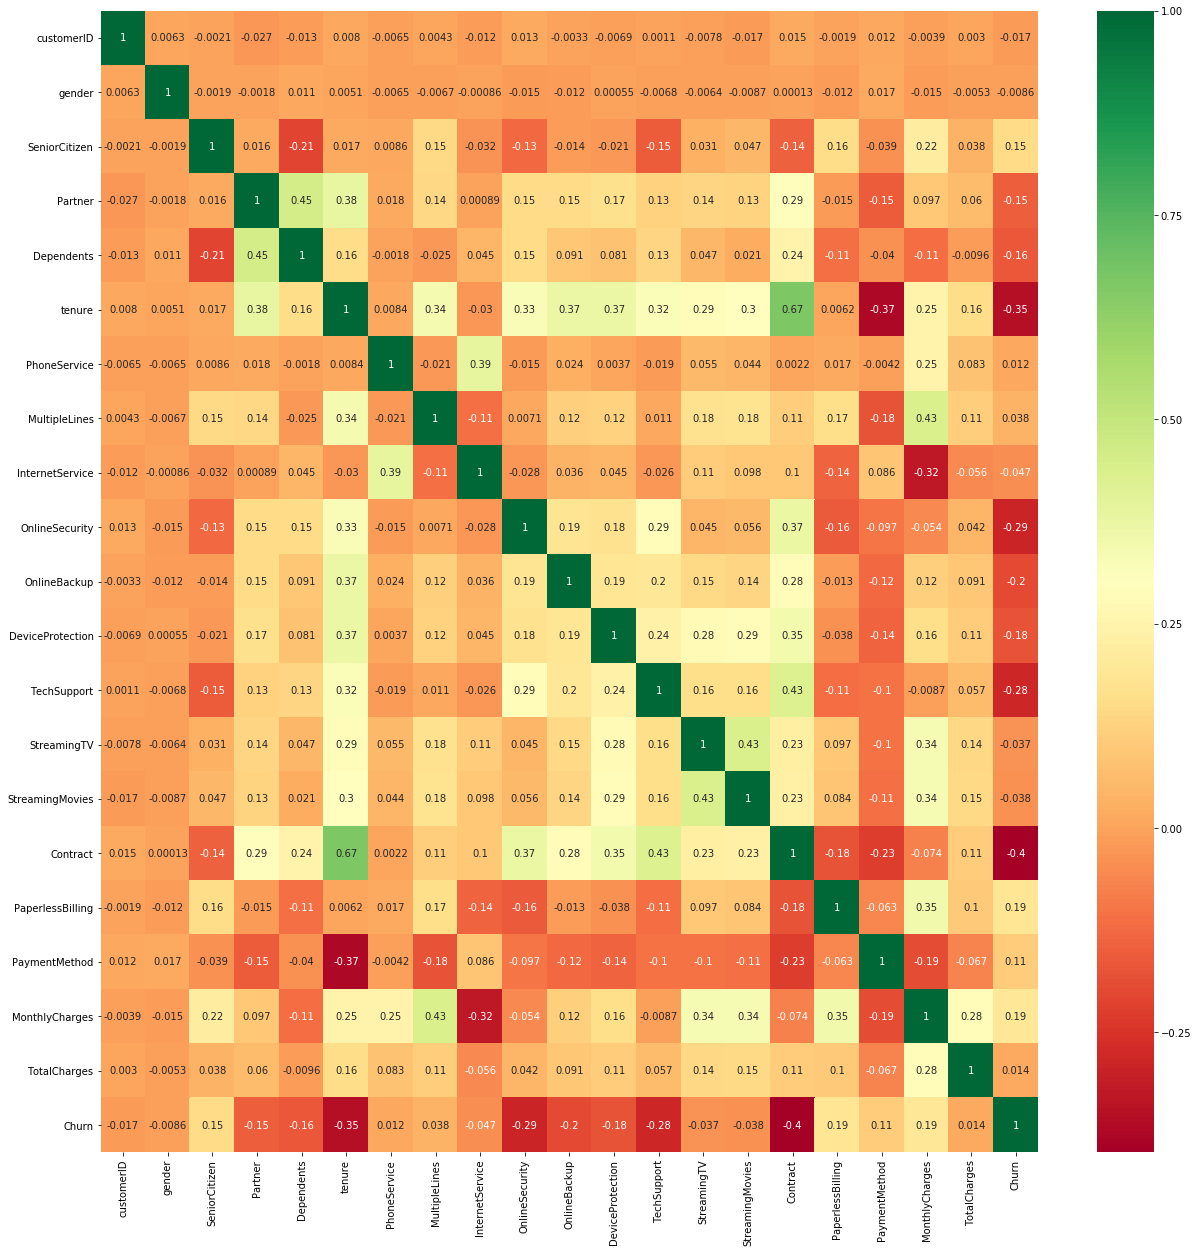

In [78]:
corrmat =data.corr()
corrmat
plt.figure(figsize=(21,21))
g= sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [47]:
%qtconsole